# Life Expectancy Data



**Dataset extraído de: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who**

Se trata de un repositorio de datos elaborado por el **Observatorio Mundial de la Salud (GHO)**, dependiente de la **Organización Mundial de la Salud (OMS)**. Contiene datos relacionados con la esperanza de vida y diversos indicadores de salud, económicos y sociales para 193 países, considerando el periodo 2000-2015.

### Descripción de las Variables

1. **Country**: Nombre del país.
2. **Year**: Año de los datos.
3. **Status**: Estado de desarrollo del país (Desarrollado o En desarrollo).
4. **Life expectancy**: Esperanza de vida al nacer en años.
5. **Adult Mortality**: Tasa de mortalidad adulta por 1000 habitantes.
6. **Infant deaths**: Número de muertes infantiles por cada 1000 nacidos vivos.
7. **Alcohol**: Consumo de alcohol per cápita (mayores de 15 años) en litros.
8. **Percentage expenditure**: Gasto en salud como porcentaje del Producto Interno Bruto (PIB).
9. **Hepatitis B**: Cobertura de vacunación contra la hepatitis B en niños (%).
10. **Measles**: Número de casos reportados de sarampión por 1.000.000 de habitantes.
11. **BMI**: Índice de masa corporal promedio de la población.
12. **Under-five deaths**: Número de muertes de niños menores de cinco años por cada 1000 nacidos vivos.
13. **Polio**: Cobertura de vacunación contra la poliomielitis en niños (%).
14. **Total expenditure**: Gasto total en salud como porcentaje del PIB.
15. **Diphtheria**: Cobertura de vacunación contra la difteria en niños (%).
16. **HIV/AIDS**: Prevalencia de VIH/SIDA en la población adulta (%).
17. **GDP**: Producto Interno Bruto per cápita en dólares estadounidenses.
18. **Population**: Población total del país.
19. **Thinness 1-19 years**: Prevalencia de delgadez entre la población de 1 a 19 años (%).
20. **Thinness 5-9 years**: Prevalencia de delgadez entre la población de 5 a 9 años (%).
21. **Income composition of resources**: Índice compuesto de ingresos (de 0 a 1).
22. **Schooling**: Promedio de años de escolaridad en la población.

In [43]:
# Importamos las librerías a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
# Importamos el archivo en csv

dataset = pd.read_csv('Life Expectancy Data.csv')
dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
# Comprobamos la cantidad de filas y columnas

dataset.shape

(2938, 22)

In [6]:
# Comprobamos los nombres de las columnas, el tipo de datos y cantidad de nulos de cada una

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# Configuramos el formato para mostrar sólo 2 decimales en las series y dataframes

pd.options.display.float_format = '{:.2f}'.format

In [8]:
# Nos enfocamos en la frecuencia absoluta y relativa de los nulos de cada columna

nulos = dataset.isnull().sum().to_frame(name='Cantidad de Nulos')
nulos['Porcentaje de Nulos'] = (dataset.isnull().sum() / len(dataset)) * 100

print(nulos)

                                 Cantidad de Nulos  Porcentaje de Nulos
Country                                          0                 0.00
Year                                             0                 0.00
Status                                           0                 0.00
Life expectancy                                 10                 0.34
Adult Mortality                                 10                 0.34
infant deaths                                    0                 0.00
Alcohol                                        194                 6.60
percentage expenditure                           0                 0.00
Hepatitis B                                    553                18.82
Measles                                          0                 0.00
 BMI                                            34                 1.16
under-five deaths                                0                 0.00
Polio                                           19              

In [9]:
# Comprobamos los valores mínimos y máximos, así como las medidas de posición de las columnas que contienen datos numéricos

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.00,2007.52,4.61,2000.00,2004.00,2008.00,2012.00,2015.00
Life expectancy,2928.00,69.22,9.52,36.30,63.10,72.10,75.70,89.00
Adult Mortality,2928.00,164.80,124.29,1.00,74.00,144.00,228.00,723.00
infant deaths,2938.00,30.30,117.93,0.00,0.00,3.00,22.00,1800.00
Alcohol,2744.00,4.60,4.05,0.01,0.88,3.75,7.70,17.87
percentage expenditure,2938.00,738.25,1987.91,0.00,4.69,64.91,441.53,19479.91
Hepatitis B,2385.00,80.94,25.07,1.00,77.00,92.00,97.00,99.00
Measles,2938.00,2419.59,11467.27,0.00,0.00,17.00,360.25,212183.00
BMI,2904.00,38.32,20.04,1.00,19.30,43.50,56.20,87.30
under-five deaths,2938.00,42.04,160.45,0.00,0.00,4.00,28.00,2500.00


De acuerdo a la información indicada al comienzo, en la descripción de las variables, la variable **Infant Deaths** corresponde al **número de muertes infantiles por cada 1000 nacidos vivos**. Por lo cual, los valores que superen el millar son incorrectos. 

En la tabla generada en el chunk anterior vemos que alcanza máximos de **1800**. 

En la siguiente porción de código vamos a identificar cuántos registros incorrectos tenemos y qué porcentaje representan del total.

In [10]:
# Identificamos cuántos registros incorrectos tenemos en Infant deaths y qué porcentaje del total representan.

incorrect_entries_infant_deaths = dataset[dataset['infant deaths'] > 1000].shape[0]
total_records = dataset.shape[0]

# Calculamos el porcentaje de registros con valores mayores a 1000

percentage = (incorrect_entries_infant_deaths / total_records) * 100

# Imprimimos la cantidad de registros y el porcentaje

print(f"Cantidad de registros con más de 1000 muertes infantiles: {incorrect_entries_infant_deaths}")
print(f"Porcentaje de registros con más de 1000 muertes infanties respecto del total: {percentage:.2f}%")

Cantidad de registros con más de 1000 muertes infantiles: 13
Porcentaje de registros con más de 1000 muertes infanties respecto del total: 0.44%


In [11]:
# Vamos a individualizar los casos que tienen datos erróneos en el campo infant deaths.

more_than_1000_infant_deaths = dataset[dataset['infant deaths'] > 1000][['Country', 'Year', 'infant deaths']]

print(more_than_1000_infant_deaths)

     Country  Year  infant deaths
1189   India  2012           1100
1190   India  2011           1100
1191   India  2010           1200
1192   India  2009           1300
1193   India  2008           1300
1194   India  2007           1400
1195   India  2006           1500
1196   India  2005           1500
1197   India  2004           1600
1198   India  2003           1700
1199   India  2002           1700
1200   India  2001           1800
1201   India  2000           1800


In [12]:
# Dado que son pocos registros, y por el momento no afectan nuestro análisis, vamos a cambiar estos datos erróneos a NaN:

dataset.loc[dataset['infant deaths'] > 1000, 'infant deaths'] = np.nan

# Verificamos los cambios

print(dataset[dataset['infant deaths'].isna()][['Country', 'Year', 'infant deaths']])

     Country  Year  infant deaths
1189   India  2012            NaN
1190   India  2011            NaN
1191   India  2010            NaN
1192   India  2009            NaN
1193   India  2008            NaN
1194   India  2007            NaN
1195   India  2006            NaN
1196   India  2005            NaN
1197   India  2004            NaN
1198   India  2003            NaN
1199   India  2002            NaN
1200   India  2001            NaN
1201   India  2000            NaN


Por otra parte, observamos que la población (**population**) aparece como un tipo de dato flotante, si bien debería ser un entero. 

A continuación vamos a convertirlo y analizarlo más en detalle.

In [13]:
# Llenamos los valores NaN con un valor específico, en este caso, 0

dataset['Population'] = dataset['Population'].fillna(0)

# Convertimos la columna Population a enteros

dataset['Population'] = dataset['Population'].astype(int)

# Verificamos que la conversión se haya efectuado correctamente

print(dataset['Population'].dtype)

int32


Repasando la tabla que obtenemos mediante el **describe()**, que nos muestra los valores mínimos, máximos y las medidas de posición, vemos que el valor mínimo para la población es de **34**. 

Podríamos suponer que la cifra está expresada en millones de personas (el diccionario de datos no lo aclara). Sin embargo, al revisar el valor máximo (1.293.859.294 de habitantes), comprobamos que esto no es así. 

Vamos a revisar si es el único caso o si existen otros registros que muestren países con **menos de 20 mil habitantes**.

In [14]:
# Filtramos los registros donde la población es menor a 20000 y mayor a 0

filter_less_20000_greater_0 = dataset[(dataset['Population'] < 20000) & (dataset['Population'] > 0)]

# Ordenamos por país y por año

result_less_20000_greater_0 = filter_less_20000_greater_0[['Country', 'Year', 'Population']].sort_values(by=['Country', 'Year'])

print(result_less_20000_greater_0)

        Country  Year  Population
29      Albania  2002        3511
19      Albania  2012        2941
107     Armenia  2004        3612
127   Australia  2000       19153
126   Australia  2001       19413
...         ...   ...         ...
2713     Tuvalu  2013        1819
2812    Uruguay  2013        3485
2857    Vanuatu  2000       18563
2856    Vanuatu  2001       18929
2852    Vanuatu  2005        2937

[197 rows x 3 columns]


En el resultado obtenido, llama la atención que al ordenar por país, no hay una continuidad en los años. 

Vamos a comprobar qué ocurre con la población en los años intermedios que no aparecen en el registro anterior. 

In [15]:
# Filtramos los países que tienen por lo menos un registro con población menor a 20000 y mayor a 0

countries_with_low_population = dataset[(dataset['Population'] < 20000) & (dataset['Population'] > 0)]['Country'].unique()

# Filtramos todos los registros de esos países

filter_low_population = dataset[dataset['Country'].isin(countries_with_low_population) & (dataset['Population'] > 0)]

# Ordenamos por país y por año

result_low_population = filter_low_population[['Country', 'Year', 'Population']].sort_values(by=['Country', 'Year'])

print(result_low_population)

      Country  Year  Population
31    Albania  2000       38927
30    Albania  2001       36173
29    Albania  2002        3511
28    Albania  2003      339616
27    Albania  2004      326939
...       ...   ...         ...
2846  Vanuatu  2011      241871
2845  Vanuatu  2012      247485
2844  Vanuatu  2013      253142
2843  Vanuatu  2014       25885
2842  Vanuatu  2015       26463

[1010 rows x 3 columns]


A partir del resultado obtenido, podemos suponer que cuando la variación de la población de un país es tan significativa de un año a otro, se debe a un error de los datos en el dataset original. 

Vamos a individualizar **cuáles son los países en los que de un año a otro varió la población en más del 10%**.

In [16]:
# Excluimos del análisis a los países que tienen población igual a 0

dataset_without_0_population = dataset[dataset['Population'] > 0]

# Nos aseguramos que los datos están ordenados por país y año

dataset_without_0_population = dataset_without_0_population.sort_values(by=['Country', 'Year'])

# Calculamos el porcentaje de variación de la población por país y año

dataset_without_0_population['Variación %'] = dataset_without_0_population.groupby('Country')['Population'].pct_change() * 100

# Filtramos los países con un cambio significativo en la población (mayor o igual a 10% o menor o igual a -10%)

significant_change = dataset_without_0_population[(dataset_without_0_population['Variación %'] >= 10) | (dataset_without_0_population['Variación %'] <= -10)]

# Filtramos todos los registros de los países que tienen por lo menos un año con una variación igual o mayor al 10%

filter_significant_change = dataset_without_0_population[dataset_without_0_population['Country'].isin(significant_change['Country'])]

# Ordenamos por país y año

result_significant_change = filter_significant_change[['Country', 'Year', 'Population', 'Variación %']].sort_values(by=['Country', 'Year'])

print(result_significant_change.head(16))
print("\n")
print(result_significant_change.tail(16))
print("\n")

records_significant_change = len(significant_change)
print(f"Cantidad de registros con una variación de población mayor o igual a 10%: {records_significant_change}")

        Country  Year  Population  Variación %
15  Afghanistan  2000      293756          NaN
14  Afghanistan  2001     2966463       909.84
13  Afghanistan  2002    21979923       640.95
12  Afghanistan  2003     2364851       -89.24
11  Afghanistan  2004    24118979       919.89
10  Afghanistan  2005      257798       -98.93
9   Afghanistan  2006     2589345       904.41
8   Afghanistan  2007    26616792       927.94
7   Afghanistan  2008     2729431       -89.75
6   Afghanistan  2009      284331       -89.58
5   Afghanistan  2010     2883167       914.02
4   Afghanistan  2011     2978599         3.31
3   Afghanistan  2012     3696958        24.12
2   Afghanistan  2013    31731688       758.32
1   Afghanistan  2014      327582       -98.97
0   Afghanistan  2015    33736494     10198.64


       Country  Year  Population  Variación %
2937  Zimbabwe  2000    12222251          NaN
2936  Zimbabwe  2001    12366165         1.18
2935  Zimbabwe  2002      125525       -98.98
2934  Zimbabwe 

En el resultado anterior, vemos que hay **1312 registros** (sobre un total de 2938) en los que se verifica una variación de la población igual o mayor al 10%. 

Tal variación hace suponer errores en el registro de ese campo, por lo cual no lo tomaremos en cuenta para los análisis subsiguientes. 

Avanzamos graficando un histograma de la **Esperanza de Vida** (**Life Expectancy**). Para ello, decidimos dejar de lado los registros nulos, ya que sólo constituyen el 0.34% de los datos.

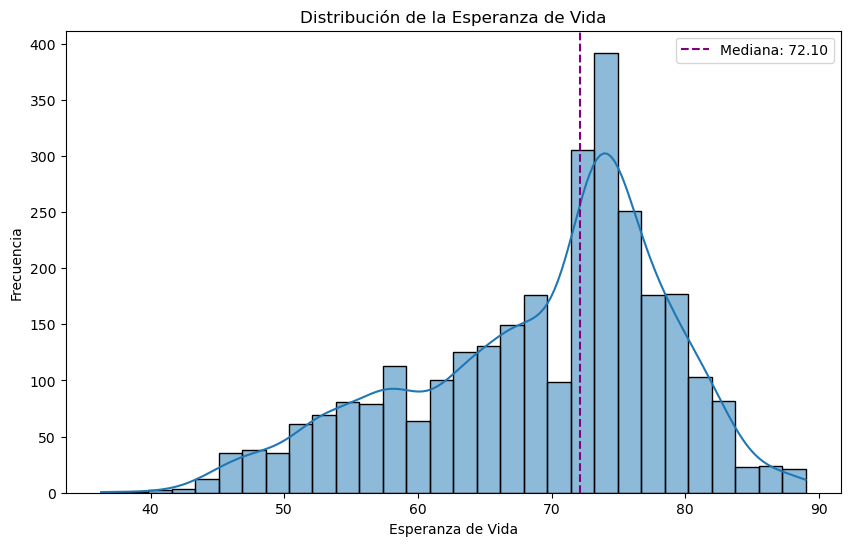

In [17]:
# Excluimos los registros nulos

life_expectancy_without_nulls = dataset.dropna(subset=['Life expectancy '])

# Armamos el histograma de la esperanza de vida

plt.figure(figsize=(10, 6))
sns.histplot(life_expectancy_without_nulls['Life expectancy '], bins=30, kde=True)
plt.title('Distribución de la Esperanza de Vida')
plt.xlabel('Esperanza de Vida')
plt.ylabel('Frecuencia')

# Calculamos la mediana de la esperanza de vida y la agregamos al histograma

median_life_expectancy = life_expectancy_without_nulls['Life expectancy '].median()

plt.axvline(median_life_expectancy, color='purple', linestyle='--', label=f'Mediana: {median_life_expectancy:.2f}')
plt.legend()
plt.show()

Una vez calculada la mediana de la esperanza de vida para el total de países, vamos a desagregar el análisis de la esperanza de vida según si se trata de **países desarrollados** o **países en vías de desarrollo**. Usaremos diagramas de caja para poder comprar gráficamente las medidas de posición. 

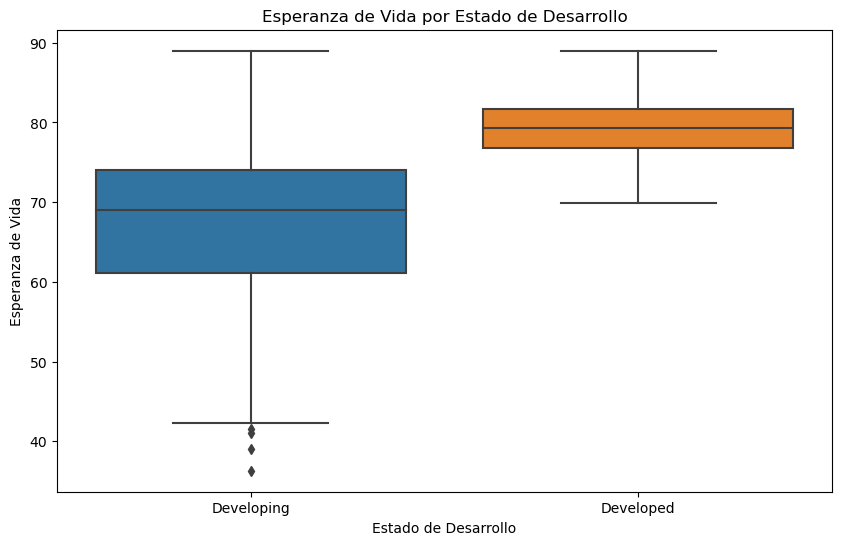

In [18]:
# Diagrama de Caja para comparar la esperanza de vida de los países en desarrollo con respecto a la de los países desarrollados

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=life_expectancy_without_nulls)
plt.title('Esperanza de Vida por Estado de Desarrollo')
plt.xlabel('Estado de Desarrollo')
plt.ylabel('Esperanza de Vida')
plt.show()

Utilizando diagramas de cajas podemos ver que la mediana de la esperanza de vida en los países desarrollados es mucho mayor que aquella de los países en vías de desarrollo. 

Lo más preocupante es comprobar la diferencia que existe en ambos grupos de países entre los valores mínimos y el primer cuartil: para los **países en vías de desarrollo** esto significa que el 25% de las personas tiene una esperanza de vida al nacer de entre 39 y 60 años (aprox), mientras que para los **países desarrollados** el 25% de sus habitantes tiene una esperanza de vida de entre 69 y 80 años (aprox). 

In [19]:
# Con el siguiente código, comprobamos los valores que asume la mediana de la esperanza de vida en ambos grupos de países.

median_developed = dataset[dataset['Status'] == 'Developed']['Life expectancy '].median()
median_developing = dataset[dataset['Status'] == 'Developing']['Life expectancy '].median()

print(f"Mediana de esperanza de vida en países desarrollados: {median_developed} años")
print(f"Mediana de esperanza de vida en países en desarrollo: {median_developing} años")

Mediana de esperanza de vida en países desarrollados: 79.25 años
Mediana de esperanza de vida en países en desarrollo: 69.0 años


A continuación evaluaremos la correlación entre la **Esperanza de Vida** y el resto de las variables numéricas.

In [20]:
# Seleccionamos sólo las columnas numéricas

numeric_columns = dataset.select_dtypes(include='number')

# Calculamos la matriz de correlación

correlation_matrix = numeric_columns.corr()

# Obtenemos la correlación de todas las variables con respecto a la esperanza de vida

life_expectancy_correlation = correlation_matrix['Life expectancy '].sort_values(ascending=False)

life_expectancy_correlation

Life expectancy                    1.00
Schooling                          0.75
Income composition of resources    0.72
 BMI                               0.57
Diphtheria                         0.48
Polio                              0.47
GDP                                0.46
Alcohol                            0.40
percentage expenditure             0.38
Hepatitis B                        0.26
Total expenditure                  0.22
Year                               0.17
Population                        -0.03
Measles                           -0.16
under-five deaths                 -0.22
infant deaths                     -0.30
 thinness 5-9 years               -0.47
 thinness  1-19 years             -0.48
 HIV/AIDS                         -0.56
Adult Mortality                   -0.70
Name: Life expectancy , dtype: float64

En el chunk anterior, observamos que la mayor correlación con la **Esperanza de Vida** se da con **Escolaridad** (**Schooling**), seguido de cerca por el **Índice Compuesto de Ingresos** (**Income composition of resources**). 

También encontramos una alta correlación, pero en este caso negativa, entre **Esperanza de Vida** y **Mortalidad en adultos** (**Adult Mortality**). Lo cual indica que una menor tasa de mortalidad en adultos se corresponde con una alta esperanza de vida al nacer, y viceversa. En los siguientes chunks ahondaremos en las dos primeras correlaciones, ya que consideramos a esta última redundante para su análisis. 

Otro aspecto que nos resultó llamativo al evaluar las correlaciones fue la baja correlación entre la **Esperanza de Vida** y el **Gasto Total en Salud** como porcentaje del PIB (**Total Expenditure**).

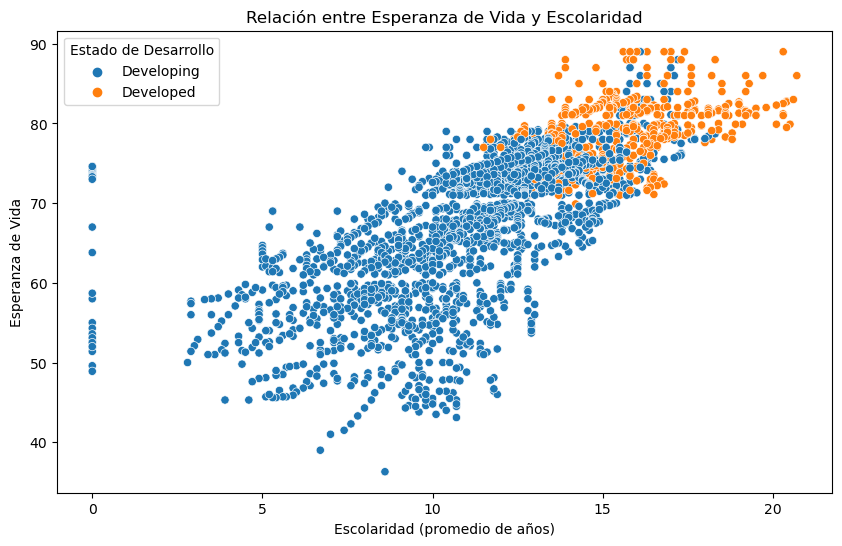

In [21]:
# Gráfico de dispersión para analizar la relación entre la Esperanza de Vida y la Escolaridad.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy ', data=dataset, hue='Status')
plt.title('Relación entre Esperanza de Vida y Escolaridad')
plt.xlabel('Escolaridad (promedio de años)')
plt.ylabel('Esperanza de Vida')
plt.legend(title='Estado de Desarrollo')
plt.show()

Tal como se anticipó al evaluar la correlación entre variables, el gráfico de dispersión refleja una **tendencia general ascendente**, es decir que **a medida que aumenta la escolaridad tiende a aumentar la esperanza de vida**. Esta relación positiva existe para ambos grupos de países (desarrollados y en desarrollo). 

Se observa una **menor dispersión de los puntos en los países desarrollados**, para los cuales vemos que la mayoría de los datos se agrupan en niveles altos de escolaridad y esperanza de vida.

En cambio, **para los países en desarrollo hay una mayor dispersión de los puntos**, lo que demuestra una variabilidad más amplia en la escolaridad y la esperanza de vida.

Vamos a calcular el **coeficiente de determinación (R²)** para ambas variables.

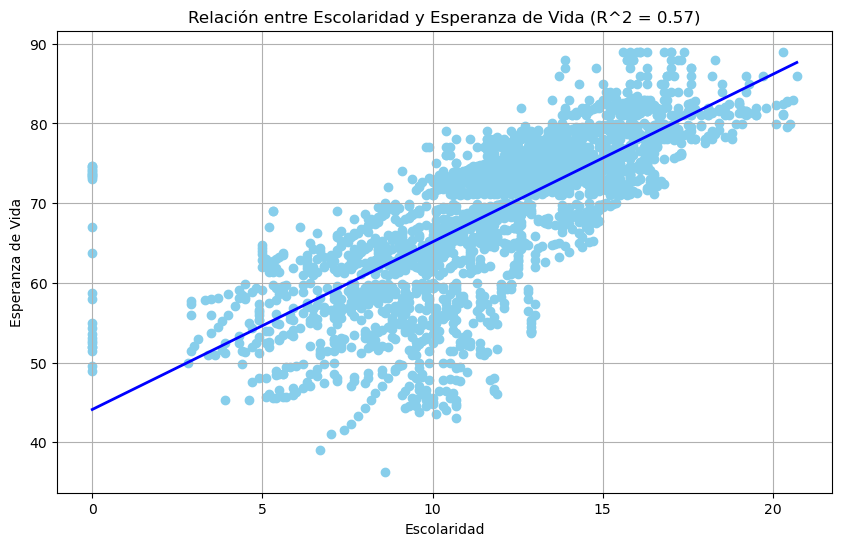

R^2 asociado: 0.57


In [22]:
# Eliminamos las filas con valores nulos en Life expectancy y Schooling

life_exp_schooling_not_nulls = dataset.dropna(subset=['Life expectancy ', 'Schooling'])

X = life_exp_schooling_not_nulls[['Schooling']]
y = life_exp_schooling_not_nulls['Life expectancy ']

model = LinearRegression()
model.fit(X, y)

# Calculamos el coeficiente de determinación R^2

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Graficamos

plt.figure(figsize=(10, 6))
plt.scatter(life_exp_schooling_not_nulls['Schooling'], life_exp_schooling_not_nulls['Life expectancy '], color='skyblue')

# Calculamos la pendiente e intersección en el eje y

slope = model.coef_[0]
intercept = model.intercept_

# Generamos valores x para la recta de regresión

x_values = np.linspace(min(life_exp_schooling_not_nulls['Schooling']), max(life_exp_schooling_not_nulls['Schooling']), 100)

# Calculamos los valores y correspondientes usando la ecuación de la recta

y_values = slope * x_values + intercept

# Graficamos la recta de regresión

plt.plot(x_values, y_values, color='blue', linewidth=2)
plt.title(f'Relación entre Escolaridad y Esperanza de Vida (R^2 = {r2:.2f})')
plt.xlabel('Escolaridad')
plt.ylabel('Esperanza de Vida')
plt.grid(True)
plt.show()

print(f'R^2 asociado: {r2:.2f}')

El **coeficiente de determinación** obtenido se corresponde con el cuadrado del **coeficiente de correlación**, e indica que la escolaridad como variable explica en un **57%** a la variable esperanza de vida para ambos grupos de países. 

Veamos si al desagregar los países por grado de desarrollo obtenemos resultados similares.

In [23]:
# Calculamos R² para todos los países

X_all = life_exp_schooling_not_nulls[['Schooling']].values
y_all = life_exp_schooling_not_nulls['Life expectancy '].values
model.fit(X_all, y_all)
y_pred_all = model.predict(X_all)
r2_all = r2_score(y_all, y_pred_all)

# Calculamos R² para los países desarrollados

developed = life_exp_schooling_not_nulls[life_exp_schooling_not_nulls['Status'] == 'Developed']
X_developed = developed[['Schooling']].values
y_developed = developed['Life expectancy '].values
model.fit(X_developed, y_developed)
y_pred_developed = model.predict(X_developed)
r2_developed = r2_score(y_developed, y_pred_developed)

# Calculamos R² para los países en desarrollo

developing = life_exp_schooling_not_nulls[life_exp_schooling_not_nulls['Status'] == 'Developing']
X_developing = developing[['Schooling']].values
y_developing = developing['Life expectancy '].values
model.fit(X_developing, y_developing)
y_pred_developing = model.predict(X_developing)
r2_developing = r2_score(y_developing, y_pred_developing)

print(f'R^2 para todos los países: {r2_all:.2f}')
print(f'R^2 para países desarrollados: {r2_developed:.2f}')
print(f'R^2 para países en desarrollo: {r2_developing:.2f}')

R^2 para todos los países: 0.57
R^2 para países desarrollados: 0.16
R^2 para países en desarrollo: 0.47


Al calcular el **coeficiente de determinación** para todos los países aparece una relación positiva moderada entre la **escolaridad** y la **esperanza de vida**: la escolaridad parece ser un factor relevante en la determinación de la esperanza de vida. 

Sin embargo, en los **países desarrollados** la relación entre escolaridad y esperanza de vida es mucho más débil. Podríamos suponer que existen otros factores (como el acceso universal a la atención médica de calidad, estilos de vida saludables y otras políticas sociales) que juegan un papel más importante en la determinación de la esperanza de vida. En estos países, la escolaridad está más homogéneamente distribuida y su impacto marginal en la esperanza de vida es menor.

Para los **países en desarrollo** observamos una relación más fuerte entre la escolaridad y la esperanza de vida, lo cual sugiere que la educación tiene un impacto mucho más significativo en la calidad de vida y la salud en estos países. Las personas con mayor escolaridad probablemente tengan mejor acceso a información sobre salud, empleos más seguros y mejores ingresos, lo que contribuye a una mayor esperanza de vida.

Dicho de otro modo, la **escolaridad** es un buen predictor de la **esperanza de vida**, pero su impacto varía significativamente según el nivel de desarrollo del país.

------------------------------------------------------------------------------------------------------------------------
Hagamos el ejercicio de corroborar qué pasa con la segunda de las variables que obtuvo mayor puntaje en el análisis de la correlación con respecto a la **esperanza de vida**: el **Índice Compuesto de Ingresos (Income Composition of Resources)**. 

In [24]:
# Eliminamos las filas con valores nulos en Life expectancy y Income composition of resources

life_exp_resources_not_nulls = dataset.dropna(subset=['Income composition of resources', 'Life expectancy '])

# Calculamos R² para todos los países

X_all = life_exp_resources_not_nulls[['Income composition of resources']].values
y_all = life_exp_resources_not_nulls['Life expectancy '].values
model.fit(X_all, y_all)
y_pred_all = model.predict(X_all)
r2_all = r2_score(y_all, y_pred_all)

# Calculamos R² para los países desarrollados

developed = life_exp_resources_not_nulls[life_exp_schooling_not_nulls['Status'] == 'Developed']
X_developed = developed[['Income composition of resources']].values
y_developed = developed['Life expectancy '].values
model.fit(X_developed, y_developed)
y_pred_developed = model.predict(X_developed)
r2_developed = r2_score(y_developed, y_pred_developed)

# Calculamos R² para los países en desarrollo

developing = life_exp_resources_not_nulls[life_exp_schooling_not_nulls['Status'] == 'Developing']
X_developing = developing[['Income composition of resources']].values
y_developing = developing['Life expectancy '].values
model.fit(X_developing, y_developing)
y_pred_developing = model.predict(X_developing)
r2_developing = r2_score(y_developing, y_pred_developing)

print(f'R^2 para todos los países: {r2_all:.2f}')
print(f'R^2 para países desarrollados: {r2_developed:.2f}')
print(f'R^2 para países en desarrollo: {r2_developing:.2f}')

R^2 para todos los países: 0.53
R^2 para países desarrollados: 0.52
R^2 para países en desarrollo: 0.41


Al igual que en la dupla **escolaridad**-**esperanza de vida**, encontramos una relación positiva moderada entre la **composición de ingresos** y la **esperanza de vida** al considerar todos los países. 

Al desagregar según el grado de desarrollo, vemos que en los **países desarrollados** la relación entre la **composición de ingresos** y la **esperanza de vida** es casi tan fuerte como a nivel global. Esto sugiere que a pesar de que en estos países pueden operar factores como una mayor cobertura médica y políticas sociales extendidas, la composición de ingresos sigue siendo un determinante significativo de la esperanza de vida.

En los **países en desarrollo**, la relación entre la **composición de ingresos** y la **esperanza de vida** es un poco más débil en comparación con los países desarrollados. Para estos países, la variable **escolaridad** resulta un poco más relevante al explicar la **esperanza de vida** que la variable **composición de ingresos**. 

------------------------------------------------------------------------------------------------------------------------
A continuación vamos a analizar otra variable que detectamos como llamativa al analizar su correlación con **esperanza de vida**: el **Gasto Total en Salud** como porcentaje del PIB (**Total Expenditure**).

- Cabe aclarar el dataset presenta otra variable similar, **Percentage Expenditure**, la cual de acuerdo a la definición que figura en el diccionario de datos aparece como **"Gasto en salud como porcentaje del Producto Interno Bruto (PIB)"**. No obstante, al corroborar las medidas de posición, vemos que asume valores que no se corresponden con un porcentaje del PBI. Por tal motivo, decidimos no tomarla en cuenta para el análisis y quedarnos únicamente con **Total Expenditure**.  

In [25]:
# Excluimos los países que tienen valores nulos en 'Total expenditure'

total_expenditure_not_null = dataset.dropna(subset=['Total expenditure'])

# Nos aseguramos de que los datos están ordenados por país y año

total_expenditure_not_null = total_expenditure_not_null.sort_values(by=['Country', 'Year'])

# Calculamos el porcentaje de variación del gasto total por país y año

total_expenditure_not_null['Variación %'] = total_expenditure_not_null.groupby('Country')['Total expenditure'].pct_change() * 100

# Filtramos los países con un cambio significativo en el gasto total (mayor o igual a 75% o menor o igual a -75%)

significant_change_total_expenditure = total_expenditure_not_null[(total_expenditure_not_null['Variación %'] >= 75) | (total_expenditure_not_null['Variación %'] <= -75)]

# Filtramos todos los registros de los países que tienen por lo menos un año con una variación igual o mayor al 75%

filter_significant_change_expenditure = total_expenditure_not_null[total_expenditure_not_null['Country'].isin(significant_change_total_expenditure['Country'])]

# Ordenamos por país y año

result_change_expenditure = filter_significant_change_expenditure[['Country', 'Year', 'Total expenditure', 'Variación %']].sort_values(by=['Country', 'Year'])

print(result_change_expenditure.head(15))
print("\n")
print(result_change_expenditure.tail(15))
print("\n")

records_change_expenditure = len(significant_change_total_expenditure)
print(f"Cantidad de registros con una variación de gasto total de más o menos 75%: {records_change_expenditure}")

   Country  Year  Total expenditure  Variación %
63  Angola  2000               2.79          NaN
62  Angola  2001               5.38        92.83
61  Angola  2002               3.63       -32.53
60  Angola  2003               4.41        21.49
59  Angola  2004               4.71         6.80
58  Angola  2005               4.10       -12.95
57  Angola  2006               4.54        10.73
56  Angola  2007               3.38       -25.55
55  Angola  2008               3.84        13.61
54  Angola  2009               4.37        13.80
53  Angola  2010               3.39       -22.43
52  Angola  2011               3.38        -0.29
51  Angola  2012               3.30        -2.37
50  Angola  2013               4.26        29.09
49  Angola  2014               3.31       -22.30


      Country  Year  Total expenditure  Variación %
2825  Uruguay  2000               7.82          NaN
2824  Uruguay  2001               7.46        -4.60
2823  Uruguay  2002               7.18        -3.75
2822  

In [26]:
# Obtenemos los países con variaciones significativas en el gasto total en salud (+/- 75% de un año a otro)

countries_with_significant_change = significant_change_total_expenditure['Country'].unique()

print("Países con una variación de gasto total de más o menos 75% en algún año:")
print(countries_with_significant_change)

Países con una variación de gasto total de más o menos 75% en algún año:
['Angola' 'Austria' 'Belgium' 'Burundi' 'Canada' 'Cuba'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Equatorial Guinea' 'France' 'Georgia' 'Germany' 'Haiti' 'Iceland'
 'Japan' 'Kiribati' 'Kuwait' 'Lebanon' 'Lesotho' 'Liberia' 'Malawi'
 'Micronesia (Federated States of)' 'Netherlands' 'New Zealand' 'Nigeria'
 'Paraguay' 'Portugal' 'Republic of Moldova' 'Rwanda'
 'Sao Tome and Principe' 'Serbia' 'Sierra Leone' 'Switzerland'
 'Timor-Leste' 'Uruguay']


Es sumamente atípico que exista una **variación del 75% o más** en el gasto total de salud en un país de un año a otro, por lo cual seguramente se trate de un error en el registro de los datos. Vamos a imputar a cada país su **mediana** en la variable **Gasto Total**.

In [35]:
# Reemplazamos los valores nulos en Total expenditure por cero

dataset['Total expenditure'] = dataset['Total expenditure'].fillna(0).astype(float)

# Calculamos la mediana de Total expenditure para cada país

median_expenditure = dataset.groupby('Country')['Total expenditure'].median().reset_index()

# Ordenamos los países en orden alfabético y renombramos las columnas

median_expenditure = median_expenditure.sort_values(by='Country')

median_expenditure.columns = ['Country', 'Median Total Expenditure']

print(median_expenditure)

                                Country  Median Total Expenditure
0                           Afghanistan                      8.19
1                               Albania                      5.94
2                               Algeria                      3.83
3                                Angola                      3.73
4                   Antigua and Barbuda                      4.51
..                                  ...                       ...
188  Venezuela (Bolivarian Republic of)                      4.93
189                            Viet Nam                      5.73
190                               Yemen                      4.96
191                              Zambia                      4.99
192                            Zimbabwe                      6.38

[193 rows x 2 columns]


Analicemos el **Gasto Total en Salud** de los países (a partir de su mediana), clasificándolos en 4 grupos: 
- **Bajo** (de 0 a 3 % del PBI)
- **Medio-Bajo** (de 3 a 6 % del PBI)
- **Medio-Alto** (de 6 a 9 % del PBI)
- **Alto** (más de 9 % del PBI)

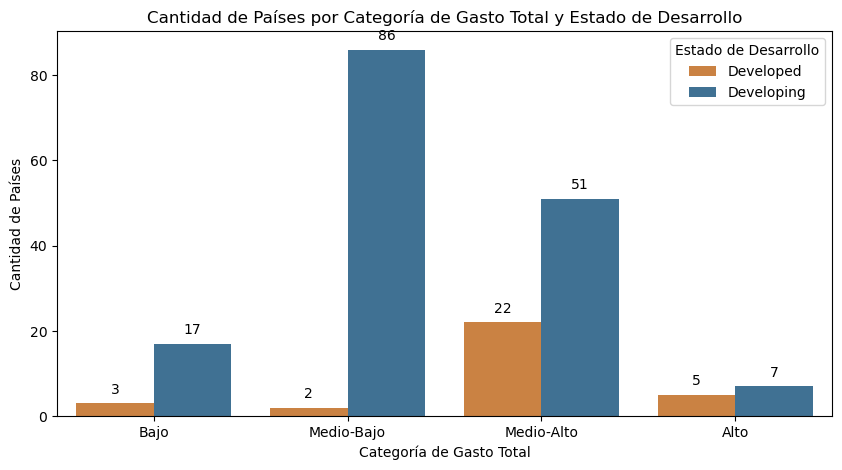

In [52]:
# Reemplazamos los valores nulos en Total Expenditure por cero

dataset['Total expenditure'] = dataset['Total expenditure'].fillna(0).astype(float)

# Calculamos la mediana de Total Expenditure para cada país

median_expenditure = dataset.groupby('Country')['Total expenditure'].median().reset_index()

# Utilizando la mediana de Total Expenditure, diferenciamos los países según sean desarrollados o en desarrollo

median_expenditure = median_expenditure.merge(dataset[['Country', 'Status']].drop_duplicates(), on='Country')

# Renombramos las columnas

median_expenditure.columns = ['Country', 'Median Total Expenditure', 'Status']

# Agrupamos a los países en categorías según su mediana de gasto total

bins = [0, 3, 6, 9, float('inf')]
labels = ['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']
median_expenditure['Expenditure Category'] = pd.cut(median_expenditure['Median Total Expenditure'], bins=bins, labels=labels, include_lowest=True)

# Calculamos la cantidad de países en cada categoría y estado de desarrollo

category_counts = median_expenditure.groupby(['Expenditure Category', 'Status']).size().reset_index(name='Counts')

# Graficamos

palette = {'Developing': '#3274A1', 'Developed': '#E1812C'}
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x='Expenditure Category', y='Counts', hue='Status', data=category_counts, palette=palette)
plt.title('Cantidad de Países por Categoría de Gasto Total y Estado de Desarrollo')
plt.xlabel('Categoría de Gasto Total')
plt.ylabel('Cantidad de Países')
plt.legend(title='Estado de Desarrollo')

# Añadimos etiquetas a las barras

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')

plt.show()

Si bien el gráfico obtenido nos permite hacernos una idea de la distribución del gasto en salud según el grado de desarrollo de los países analizados, vamos a repetir el gráfico centrándonos en la proporción de los países según su desarrollo. 

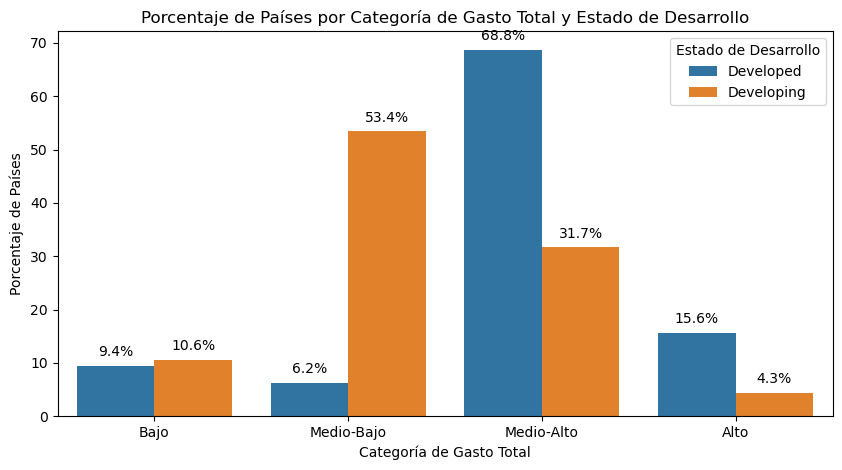

In [53]:
# Reemplazamos los valores nulos en Total Expenditure por cero

dataset['Total expenditure'] = dataset['Total expenditure'].fillna(0).astype(float)

# Calculamos la mediana de Total Expenditure para cada país

median_expenditure = dataset.groupby('Country')['Total expenditure'].median().reset_index()

# Utilizando la mediana de Total Expenditure, diferenciamos los países según sean desarrollados o en desarrollo

median_expenditure = median_expenditure.merge(dataset[['Country', 'Status']].drop_duplicates(), on='Country')

# Renombramos las columnas

median_expenditure.columns = ['Country', 'Median Total Expenditure', 'Status']

# Agrupamos a los países en categorías según su mediana de gasto total

bins = [0, 3, 6, 9, float('inf')]
labels = ['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']
median_expenditure['Expenditure Category'] = pd.cut(median_expenditure['Median Total Expenditure'], bins=bins, labels=labels, include_lowest=True)

# Calculamos la cantidad de países en cada categoría y estado de desarrollo

category_counts = median_expenditure.groupby(['Expenditure Category', 'Status']).size().reset_index(name='Counts')

# Calculamos el total de países por estado de desarrollo

total_counts = median_expenditure['Status'].value_counts().reset_index()
total_counts.columns = ['Status', 'Total']

# Obtenemos el total por estado de desarrollo

category_counts = category_counts.merge(total_counts, on='Status')

# Calculamos el porcentaje de países en cada categoría

category_counts['Percentage'] = (category_counts['Counts'] / category_counts['Total']) * 100

# Graficamos

palette = {'Developing': '#3274A1', 'Developed': '#E1812C'}
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x='Expenditure Category', y='Percentage', hue='Status', data=category_counts)
plt.title('Porcentaje de Países por Categoría de Gasto Total y Estado de Desarrollo')
plt.xlabel('Categoría de Gasto Total')
plt.ylabel('Porcentaje de Países')
plt.legend(title='Estado de Desarrollo')

# Añadimos etiquetas a las barras
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f') + '%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points')

plt.show()

Al graficarlo de esta manera, se ve claramente que la mayor proporción de **países en desarrollo** tiene un **gasto total medio-bajo**, mientras que la mayoría de los **países desarrollados** tienen un **gasto total medio-alto**.

En proporción, son más los **países en desarrollo** que dedican un porcentaje **medio-bajo** o **bajo** de su PBI al gasto en salud en relación a los países desarrollados. 

Por el contrario, y de nuevo hablando en proporciones, son más los **países desarrollados** que dedican un porcentaje **medio-alto** o **alto** de su PBI al gasto en salud a comparación de los países en desarrollo. 

------------------------------------------------------------------------------------------------------------------------
Sabiendo que la población tiende progresivamente a extender su tiempo de vida y también los años dedicados a la formación y el estudio, hagamos el ejercicio de proyectar a valores actuales **cuáles serían los valores esperados** de la **esperanza de vida** y la **escolaridad** prolongando la **recta de regresión** previamente calculada.

Puntos proyectados (años de estudio y esperanza de vida):
Punto 1: Escolaridad = 21.7, Esperanza de vida = 91.6589913073782
Punto 2: Escolaridad = 22.7, Esperanza de vida = 93.9797447831235
Punto 3: Escolaridad = 23.7, Esperanza de vida = 96.30049825886877


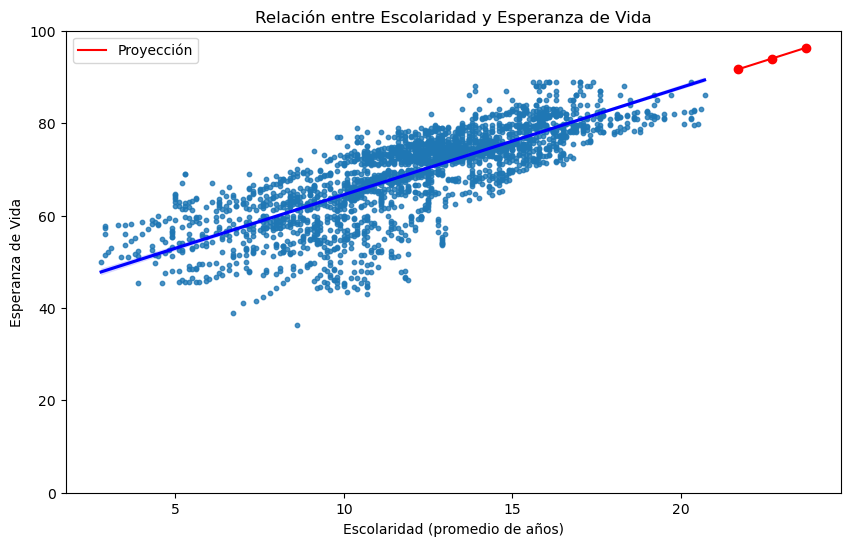

In [56]:
# Eliminamos las filas con valores nulos en Escolaridad y Esperanza de vida, y los registros con 0 en Escolaridad

dataset_clean = dataset[['Schooling', 'Life expectancy ']].dropna()
dataset_clean = dataset_clean[dataset_clean['Schooling'] > 0]

# Filtramos las columnas necesarias después de eliminar los valores nulos

x = dataset_clean['Schooling'].values.reshape(-1, 1)
y = dataset_clean['Life expectancy '].values.reshape(-1, 1)

# Generamos el modelo de regresión lineal

model = LinearRegression()
model.fit(x, y)

# Generamos los nuevos puntos proyectados

x_proj = np.arange(x.max() + 1, x.max() + 4).reshape(-1, 1)
y_proj = model.predict(x_proj)

# Graficamos los datos originales y la recta de regresión

plt.figure(figsize=(10, 6))
sns.regplot(x='Schooling', y='Life expectancy ', data=dataset_clean, scatter_kws={'s': 10}, line_kws={'color': 'blue'})

# Graficamos la proyección en rojo para diferenciarla de la recta de regresión en azul

plt.plot(x_proj, y_proj, color='red', label='Proyección')
plt.scatter(x_proj, y_proj, color='red')
plt.ylim(0, 100)  # Establecer el límite superior del eje y a 100
plt.title('Relación entre Escolaridad y Esperanza de Vida')
plt.xlabel('Escolaridad (promedio de años)')
plt.ylabel('Esperanza de Vida')
plt.legend()
plt.show()

## Conclusiones

- Indagamos en la distribución de la **Esperanza de Vida** de los países, y comprobamos que existe una gran diferencia según se trate de **países desarrollados** o **en vías de desarrollo**. 

- Indagamos en la relación entre la **Esperanza de Vida** y las demás variables del dataset, encontrando que la mayor correlación se da con **Escolaridad**, seguido del **Índice Compuesto de Ingresos**.

- La relación entre **Esperanza de Vida** y **Escolaridad** si bien presenta una tendencia general ascendente (es decir que existe una relación positiva para ambos grupos de países), es sumamente distinta según se trate de **países desarrollados** o **en vías de desarrollo**. 

- Por otro lado, la relación entre **Esperanza de Vida** e **Índice Compuesto de Ingresos** también es positiva, manteniéndose en este caso más estable independientemente del grado de desarrollo del país. 

- Clasificamos el **Gasto Total en Salud** de los países en relación a su PBI, encontrando que los **países desarrollados** suelen destinar un porcentaje **medio-alto** o **alto**, mientras que los **países en desarrollo** dedican un porcentaje **medio-bajo** o **bajo** a este ítem. 

- Proyectamos los valores de **Esperanza de Vida** y **Escolaridad** a edades más avanzadas utilizando la prolongación de la recta de regresión previamente calculada. 

- El dataset presenta datos que ameritan un análisis más cuidadoso, ya que pueden existir errores en el registro de los mismos. Identificamos que algunas de las columnas que pueden presentar errores en este sentido son la de **Mortalidad Infantil**, **Población** y **Gasto Porcentual en Salud**.   